# AMOD-5430: Data Visualization

## Final Project - Black Friday Shopping Trends: EDA and Predictive Analysis



Submitted By:-

**Jasmeet Singh Saini** (**0758054**)

**Ayush Sharma**  (**0774583**)


### Import necessary libraries


In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Load the dataset

In [2]:
local_path = "train.csv"         
df         = pd.read_csv(local_path)

### Dataset

Display the first few rows of the dataset to get an overview

In [3]:
df.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422


### Rows and Columns

There are **550068 rows** and **12 columns** present in data set i.e., before cleaning.

In [4]:
df.shape

(550068, 12)

### Checking columns names

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

### Rename the Columns

Changing the names of the columns for better understanding.

In [6]:
# Define a dictionary with the mapping of old column names to new column names (for better naming convention).
column_mapping = {
    'User_ID'                    : 'user_id',
    'Product_ID'                 : 'product_id',
    'Gender'                     : 'gender',
    'Age'                        : 'age',
    'Occupation'                 : 'occupation',
    'City_Category'              : 'city_category',
    'Stay_In_Current_City_Years' : 'stay_in_city_years',
    'Marital_Status'             : 'marital_status',
    'Product_Category_1'         : 'product_category_1',
    'Product_Category_2'         : 'product_category_2',
    'Product_Category_3'         : 'product_category_3',
    'Purchase'                   : 'purchase_amount'
}

# Rename the columns in the DataFrame
df.rename(columns = column_mapping, inplace = True)

# Display the updated DataFrame
df.head(5)


,user_id,product_id,gender,age,occupation,city_category,stay_in_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase_amount
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


## Exploratory Data Analysis

### Exploring the variables

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             550068 non-null  int64  
 1   product_id          550068 non-null  object 
 2   gender              550068 non-null  object 
 3   age                 550068 non-null  object 
 4   occupation          550068 non-null  int64  
 5   city_category       550068 non-null  object 
 6   stay_in_city_years  550068 non-null  object 
 7   marital_status      550068 non-null  int64  
 8   product_category_1  550068 non-null  int64  
 9   product_category_2  376430 non-null  float64
 10  product_category_3  166821 non-null  float64
 11  purchase_amount     550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
None


###  Data types in the dataset

There is **5 Integer (41.67%)**, **5 Object (41.67%)**, and **2 Float (16.67%)** are present before pre-processing of dataset.

In [8]:
# Count of types of data type
df.dtypes.value_counts()

int64      5
object     5
float64    2
Name: count, dtype: int64

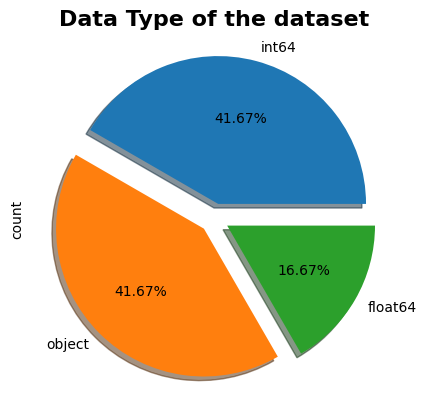

In [9]:
df.dtypes.value_counts().plot.pie(explode = [0.1,0.1,0.1],autopct = '%1.2f%%',shadow = True)
plt.title('Data Type of the dataset', fontweight = 'bold', fontsize = 16);

### Check basic statistics of the dataset

In [10]:
df.describe(include='all')

,user_id,product_id,gender,age,occupation,city_category,stay_in_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase_amount
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000,12054.000000


### Na Values

Finding out the total null values in the dataset. Then, we will look for each coloumn for null values.

In [11]:
missing_values  = df.isnull().sum()
print("\nThe total NULL values in the dataset are", missing_values.sum())

print("\nThe missing values and the percentage of missing in each columns are given below:-")
# df.isnull().sum()

percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values' : missing_values,
    'percent_missing': percent_missing
}
frame = pd.DataFrame(value)
frame


The total NULL values in the dataset are 556885

The missing values and the percentage of missing in each columns are given below:-


,missing_values,percent_missing
user_id,0,0.000000
product_id,0,0.000000
gender,0,0.000000
age,0,0.000000
occupation,0,0.000000
city_category,0,0.000000
stay_in_city_years,0,0.000000
marital_status,0,0.000000
product_category_1,0,0.000000
product_category_2,173638,31.566643


### Visualization of missing values

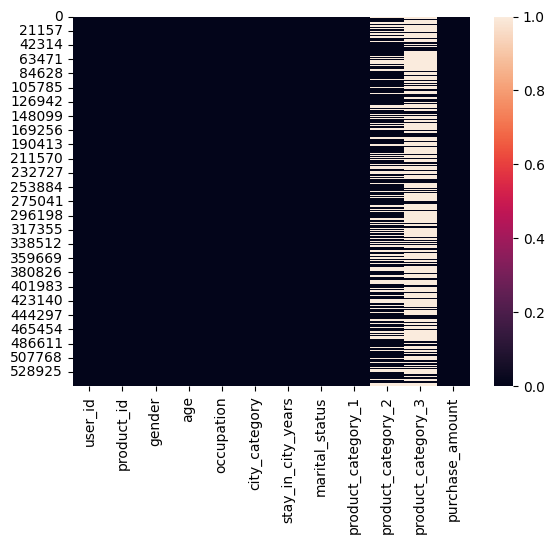

In [12]:
# Visuliing for checking null values
sns.heatmap(df.isnull())
plt.show()

Finding out the null values in each columns in the dataset by using **heatmap** which shows that null values are present in columns:

- *Product_Category_2*

- *Product_Category_3*

### Duplicates

Checking the Duplicates in the dataset.

In [13]:
print("\nThe total Duplicates values in the dataset are", df.duplicated().sum()) 


The total Duplicates values in the dataset are 0


## Identifying Unnecessary Columns



### Cleaning individual columns

**1. 'City' Column:-** It looks like the 'stay_in_city_years' column contains values like '2', '4+', '3', '1', and '0'. This column likely represents the number of years a person has stayed in the current city. The value '4+' might indicate four or more years.

In [14]:
df['stay_in_city_years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [15]:
def stay_in_city_years(value):
    if '+' in value:
        value = value.replace('+','')
        return int(value)
    else:
        return int(value)

df['stay_in_city_years'] = df['stay_in_city_years'].apply(stay_in_city_years)

Now, cleaning the 'stay_in_city_years' column by defining a function cities that removes the '+' sign if present and then converts the value to an integer. The apply method is then used to apply this function to each element in the 'stay_in_city_years' column.

And the 'stay_in_city_years' column has been successfully cleaned and now contains only numeric values. The unique values [2, 4, 3, 1, 0] indicate the number of years people have stayed in the current city. This numeric format is more suitable for analysis and modeling purposes.

In [16]:
print("The unique values of 'stay_in_city_years' variable are ",df['stay_in_city_years'].unique())
print("\nAnd the data type of 'stay_in_city_years' variable is",df.stay_in_city_years.dtype,".")

The unique values of 'stay_in_city_years' variable are  [2 4 3 1 0]

And the data type of 'stay_in_city_years' variable is int64 .


**2. 'Age' Column:-** Creating a custom function *age* to map the age ranges to more descriptive categories. Hence, it is a good way to enhance the interpretability of the 'age' column. Here, the below code successfully replaces the original **age** ranges from ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'] to categories 'child', 'old', 'adult', and 'teenage'.

In [17]:
df['age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [18]:
def age(value):
    if '0-17' in value:
        value = value.replace('0-17','child')
        return str(value)
    elif '26-35'in value:
        value = value.replace('26-35','adult')
        return str(value)
    elif '18-25'in value:
        value = value.replace('18-25','teenage')
        return str(value)
    elif '36-45'in value:
        value = value.replace('36-45','adult')
        return str(value)
    elif '46-50'in value:
        value = value.replace('46-50','adult')
        return str(value)
    elif '51-55'in value:
        value = value.replace('51-55','old')
        return str(value)
    else:
        value = value.replace('55+','old')
        return str(value)
    
df['age'] = df['age'].apply(age)

In [19]:
df['age'].unique()

array(['child', 'old', 'adult', 'teenage'], dtype=object)

Now, the 'age' column has unique values ['child', 'old', 'adult', 'teenage'].

**3. 'product_category_2' Column:-** Here, we will grouping by 'age' column. This is done by aggregating using mode. For each group (each unique age category), the 'product_category_2' column is aggregated using the pd.Series.mode function. The mode is a statistical measure that represents the most frequently occurring value in a set of values.

In [20]:
df['product_category_2'].value_counts()

product_category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [21]:
s = df.groupby('age')['product_category_2'].agg(pd.Series.mode)
s

age
adult      8.0
child      4.0
old        8.0
teenage    8.0
Name: product_category_2, dtype: float64

 The above information can be useful in understanding the typical or most common product categories for different age groups in the dataset.

In [22]:
# Fill missing values in 'product_category_2' with the mode for each age group
for key in s.index:
    df.loc[(df['age'] == key) & (df['product_category_2'].isnull()), 'product_category_2'] = s[key]

Here, it fills missing values in the 'product_category_2' column with the mode value corresponding to the age group.

In [23]:
# Count the remaining null values in 'product_category_2'
print("The null values in 'product_category_2' is ",df['product_category_2'].isnull().sum(),".")

The null values in 'product_category_2' is  0 .


**4. 'product_category_3' Column:-** Here, the process aims to impute missing values in 'product_category_3' based on the mode value within each age group (we have used the same approch as we did with product_category_3 column). 

In [24]:
# Display the distribution of values in 'product_category_3'
df.product_category_3.value_counts()

product_category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [25]:
# Group by 'age' and aggregate using mode for 'product_category_3' 
p = df.groupby('age')['product_category_3'].agg(pd.Series.mode)
p

age
adult      16.0
child      16.0
old        16.0
teenage    16.0
Name: product_category_3, dtype: float64

In [26]:
# Fill missing values in 'product_category_3' with the mode for each age group
for key in p.index:
    df.loc[(df['age']==key) & (df['product_category_3'].isnull()), 'product_category_3'] = p[key]

In [27]:
# Count the remaining null values in 'product_category_3'
print("The null values in 'product_category_3' is ",df['product_category_3'].isnull().sum(),".")

The null values in 'product_category_3' is  0 .


### After Cleaning the data (Let's check again):-


In [28]:
print(df.info())
print("\nCounting the types of data type in dataset:-\n",df.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             550068 non-null  int64  
 1   product_id          550068 non-null  object 
 2   gender              550068 non-null  object 
 3   age                 550068 non-null  object 
 4   occupation          550068 non-null  int64  
 5   city_category       550068 non-null  object 
 6   stay_in_city_years  550068 non-null  int64  
 7   marital_status      550068 non-null  int64  
 8   product_category_1  550068 non-null  int64  
 9   product_category_2  550068 non-null  float64
 10  product_category_3  550068 non-null  float64
 11  purchase_amount     550068 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 50.4+ MB
None

Counting the types of data type in dataset:-
 int64      6
object     4
float64    2
Name: count, dtype: int64


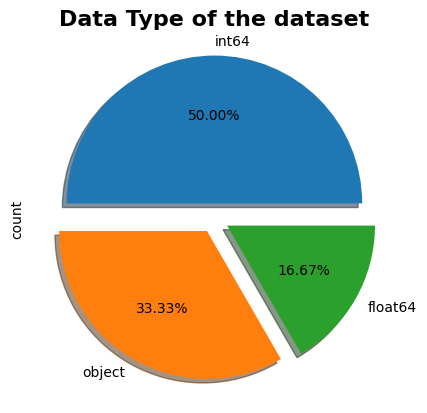

In [29]:
df.dtypes.value_counts().plot.pie(explode = [0.1,0.1,0.1],autopct = '%1.2f%%',shadow = True)
plt.title('Data Type of the dataset', fontweight = 'bold', fontsize = 16);

In [30]:
missing_values  = df.isnull().sum()
print("\nThe total NULL values in the dataset are", missing_values.sum())

print("\nThe missing values and the percentage of missing in each columns are given below:-")

percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values' : missing_values,
    'percent_missing': percent_missing
}
frame = pd.DataFrame(value)
frame


The total NULL values in the dataset are 0

The missing values and the percentage of missing in each columns are given below:-


,missing_values,percent_missing
user_id,0,0.0
product_id,0,0.0
gender,0,0.0
age,0,0.0
occupation,0,0.0
city_category,0,0.0
stay_in_city_years,0,0.0
marital_status,0,0.0
product_category_1,0,0.0
product_category_2,0,0.0


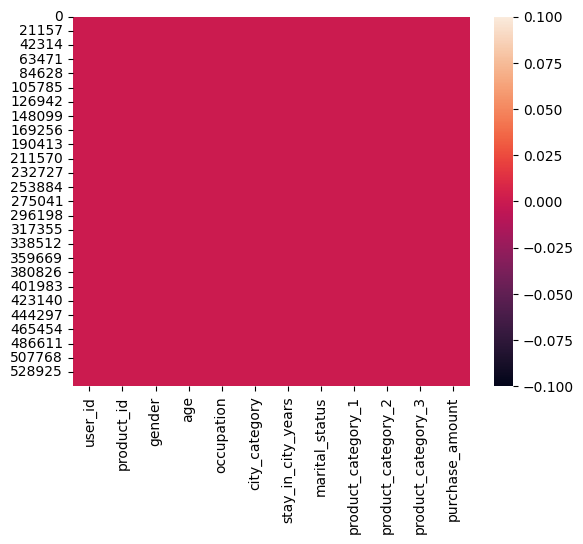

In [31]:
sns.heatmap(df.isnull())
plt.show()

Here, as we can see that the table and Heat map depitcs that there id no null/missing values in the dataset.

### Numerical values:-


In [32]:
numerical_cols = [f for f in df.columns if df.dtypes[f] != 'object']
numerical_cols.remove('purchase_amount')
numerical_cols.remove('user_id')
print("The numirical values in the dataset are given below:- \n",numerical_cols)

The numirical values in the dataset are given below:- 
 ['occupation', 'stay_in_city_years', 'marital_status', 'product_category_1', 'product_category_2', 'product_category_3']


### Categorical Values:-


In [33]:
cat_columns = [f for f in df.columns if df.dtypes[f] == 'object']
print("The Categorical values in the dataset are given below:- \n",cat_columns)

The Categorical values in the dataset are given below:- 
 ['product_id', 'gender', 'age', 'city_category']


# Data Visualization

## Exploratory Data Analysis Using Univariate Visualization Techniques

### Histogram for 'purchase_amount' with KDE

- The given plot provides insights into the distribution of **purchase amounts** in the dataset. It illustrates the *frequency* of different *purchase amounts*, showing the overall pattern and concentration of purchase values. The histogram with KDE (Kernel Density Estimate) gives an idea of the *central tendency* and spread of *purchase amounts* in the dataset. Hence, the KDE (Kernel Density Estimate) provides a **smooth curve**, emphasizing regions with **higher density**.

- The distribution of purchase amounts is **right-skewed**, indicating that *a majority of transactions involve lower purchase amounts*.

- There are some *peaks* in the histogram, suggesting certain *price ranges are more common*.

- This plot represents a **univariate analysis** as it focuses on the distribution of a single variable, namely "purchase_amount."

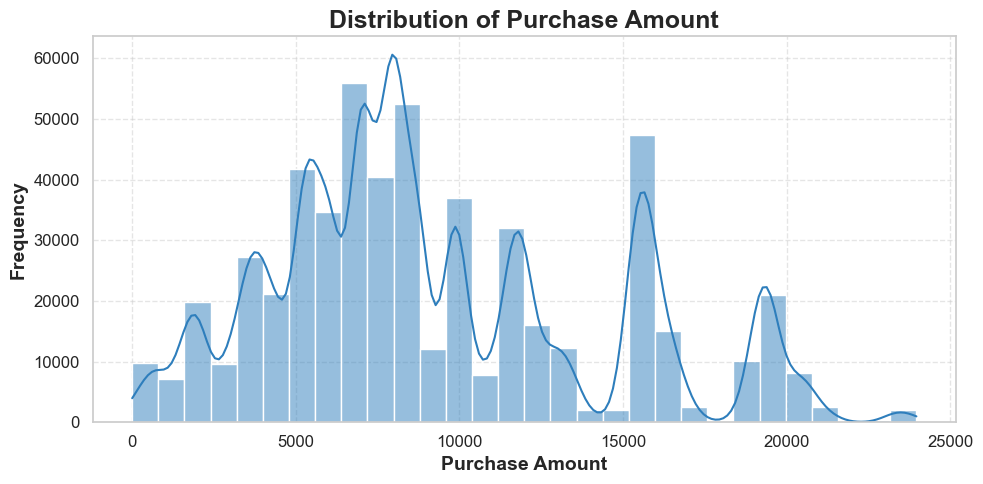

In [34]:
# Set a custom color palette
custom_palette = sns.color_palette("Blues", as_cmap=True)

# Set style
sns.set(style="whitegrid")

# Create a figure for the histogram
plt.figure(figsize=(10, 5))

# Histogram for 'purchase_amount' with KDE
sns.histplot(df['purchase_amount'], bins=30, kde=True, color=custom_palette(0.7))

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Title and Axis Labels
plt.title('Distribution of Purchase Amount', fontsize=18, fontweight='bold')
plt.xlabel('Purchase Amount', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

# Increase tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust plot layout
plt.tight_layout()

plt.show()


### Gender Distribution Countplot

- The given plot is a **univariate countplot** that provides insights into *the distribution of gender in the dataset*. 

- It illustrates the count of each gender category, helping to understand the gender distribution in the dataset. For example, *female* are **135809** and *Male* are **414259** in the terms of buying different category of products.

- The plot is **univariate** as it focuses on a *single categorical variable* (**gender**) and visualizes its distribution in making a purchase.

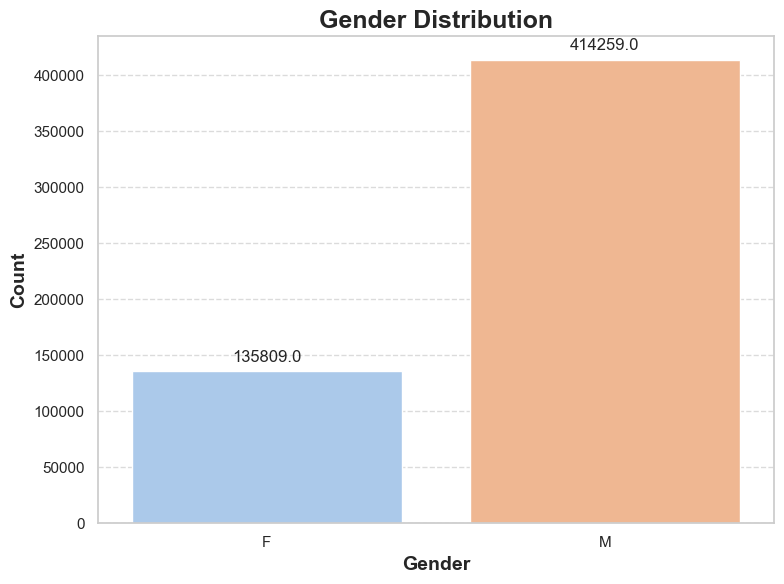

In [35]:
# Set a custom color palette for simplicity
custom_palette = sns.color_palette("pastel", 2)

# Gender Distribution Countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, hue='gender', palette=custom_palette)

# Add bar labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Title and Axis Labels
plt.title('Gender Distribution', fontweight='bold', fontsize=18)
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14,fontweight='bold')

# Adjust plot layout
plt.tight_layout()

plt.show()

### Distribution of City Categories

- The given plot is a **univariate visualization** that illustrates the distribution of city categories in the dataset. It uses a pie chart to display the proportions of each city category (identified by different colors) relative to the total count. The autopct parameter adds percentage labels to each slice, providing a quick overview of the distribution. This visualization is focused on a single categorical variable, making it univariate.

- The pie chart visually represents the proportion of each city category (e.g., City A, City B, City C) within the dataset.

- It allows viewers to quickly understand the distribution of data among different city categories based on the *percentages*. Here, **A** has **26.9%**, **B** has **42%** and **C** has **31.1%**.

- The plot is *univariate*, focusing on the distribution of a *single categorical variable* (*city_category*) in the dataset.

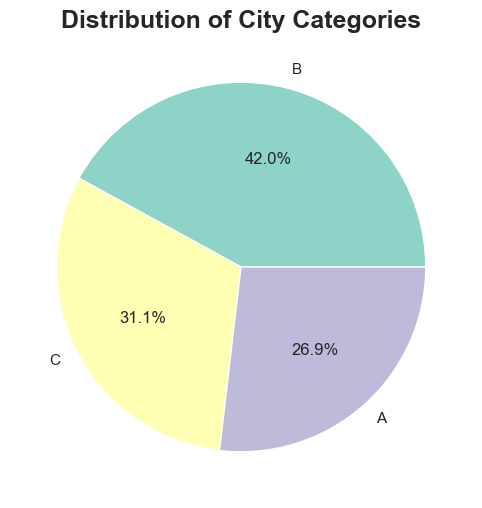

In [36]:
# Set a custom color palette for categorical data
custom_palette = sns.color_palette("Set3", n_colors=3)

# Count the occurrences of each 'city_category'
city_category_counts = df['city_category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(city_category_counts, labels=city_category_counts.index, autopct='%1.1f%%', colors=custom_palette)

# Add a title
plt.title('Distribution of City Categories', fontsize=18, fontweight='bold')

# Show the pie chart
plt.show()


### The distribution of 'age' among customers

- The given plot is a **univariate visualization** that illustrates the distribution of *age groups* in the dataset. 

- It provides insights into the *proportion of each age group among customers*. The pie chart is *color-coded* with a custom palette to represent different **age categories**, and the labels indicate the *percentage distribution of each age group* in making a purchase in Black Friday Sale.

- The given counts provide insights into the age composition of the customer base, indicating that the majority fall into the "Adult" category, followed by "Teenage," "Old," and "Child" categories. Here's a breakdown:-

**Adult**: 375,301 customers (68.2%)

**Teenage**: 99,660 customers (18.1%)

**Old**: 60,005 customers (10.9%)

**Child**: 15,102 customers (2.7%)



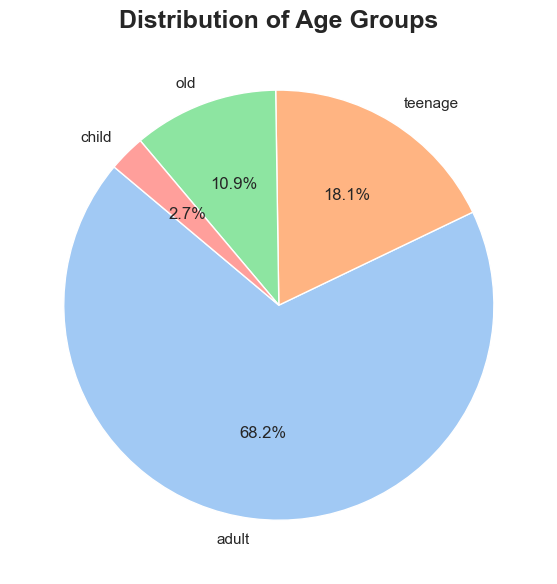

In [37]:
# Get count of each unique value in the 'age' column
age_counts = df['age'].value_counts()

# Set a custom color palette for categorical data with the correct number of colors
custom_palette = sns.color_palette("pastel", n_colors=len(age_counts))

# Create a pie chart for the distribution of 'age' among customers
plt.figure(figsize=(8, 6))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors=custom_palette, startangle=140)

# Title
plt.title('Distribution of Age Groups', fontsize=18, fontweight='bold')

# Adjust layout for better appearance
plt.tight_layout()

plt.show()


### Transactions across different 'city_category'

- The given plot is a **univariate visualization** that illustrates the count of transactions in each city category. 

- It uses a custom color palette for the city categories, and annotations on top of the bars show the numerical count for each category. This visualization helps in understanding the distribution of transactions across different city categories, providing insights into the frequency of transactions in each city.

- Regarding the multivariate nature, while the plot itself is univariate (focusing on the count of transactions in each city category), the hue parameter is utilized to distinguish different city categories, adding a second variable for visual comparison. Therefore, it can be considered a bivariate visualization with respect to the city category and transaction count.


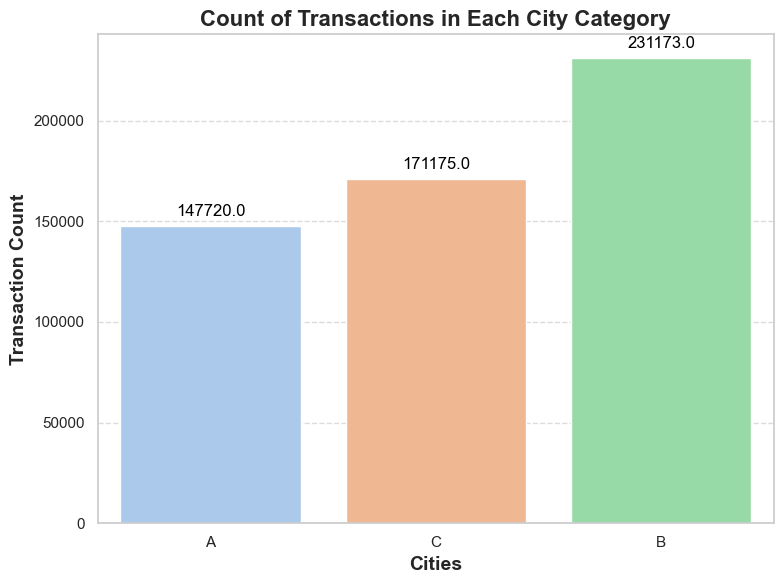

In [38]:
# Set a custom color palette
custom_palette = sns.color_palette("pastel", n_colors=3)

# Count plot for 'city_category'
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='city_category', data=df, hue='city_category', palette=custom_palette, legend=False)

# Add annotations on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12, color='black')

# Title and Axis Labels
plt.title('Count of Transactions in Each City Category', fontsize=16, fontweight='bold')
plt.xlabel('Cities', fontsize=14, fontweight='bold')
plt.ylabel('Transaction Count', fontsize=14, fontweight='bold')

# Check if legend exists before trying to remove
if ax.legend_:
    ax.legend_.remove()

# Adjust layout for better appearance
plt.tight_layout()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Distribution of Purchase Amount

- The plot depicts the distribution of the **target variable**, which is the *purchase amount*. The data appears to have a **right-skewed distribution**.

- **Normal Distribution Curve:** The green curve represents the kernel density estimate (KDE) of the *purchase amount*, providing insights into the probability density function. The black curve is a fitted normal distribution curve, indicating how well the data aligns with a normal distribution.

- **Mean and Standard Deviation:** The **mean (mu) of the purchase amount** is approximately **9263.97**. The **standard deviation (sigma)** is approximately **5023.06**.

- **Density and Aesthetics:** The y-axis represents the density of the purchase amount. Aesthetic elements, such as title, labels, and legend, enhance the interpretability of the plot.

- **Statistical Information:** The statistical information about mean and standard deviation provides a summary of the central tendency and spread of the purchase amount.

- The plot is a distribution plot with a kernel density estimate (KDE) and a fitted normal distribution curve. It is **univariate** as it focuses on the distribution of a single variable, i.e., the *purchase amount*.

C:\Users\jasme\AppData\Local\Temp\ipykernel_44908\844601653.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['purchase_amount'], color = 'green', fit = norm, kde=True)


Mean (mu): 9263.97, Standard Deviation (sigma): 5023.06


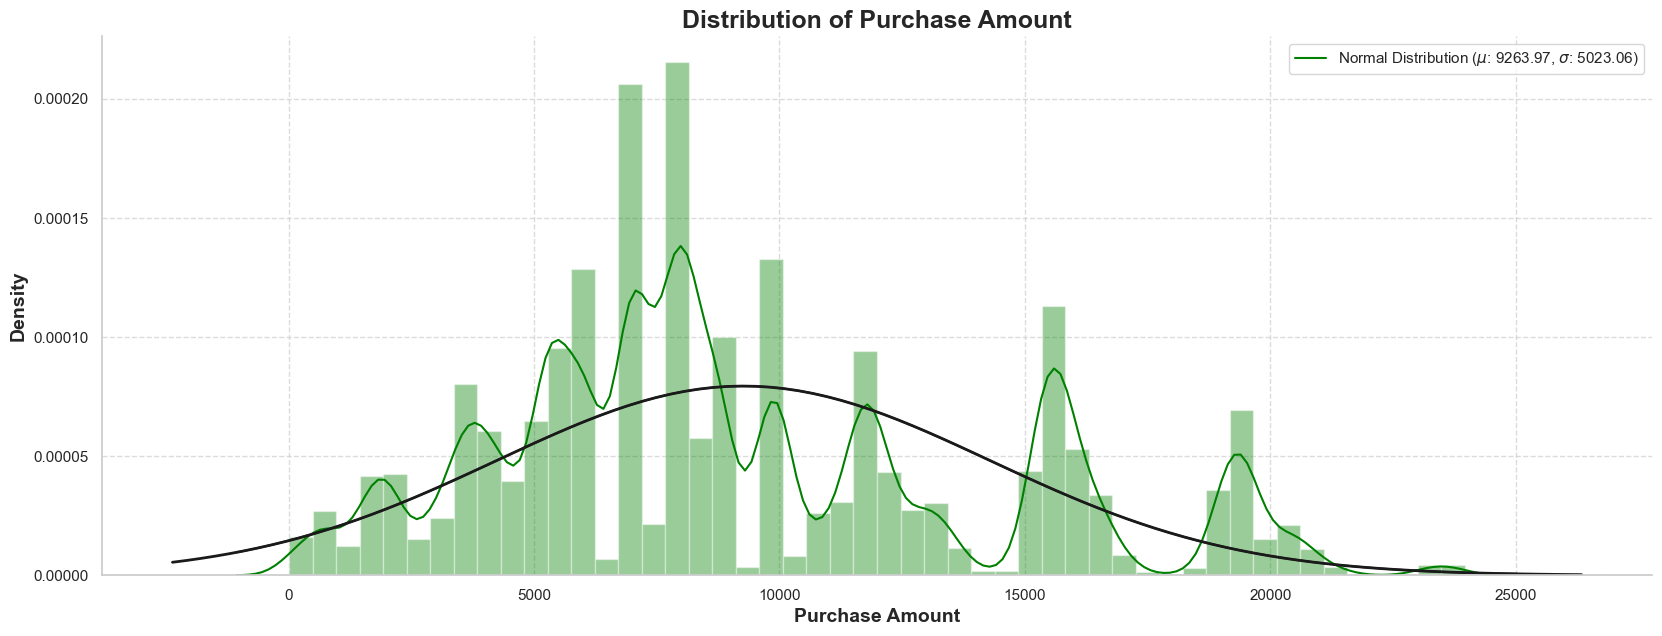

In [39]:
# Set a custom color palette
sns.set_palette("pastel")

# Plotting a distribution plot for the target variable
plt.figure(figsize=(20, 7))
#sns.histplot(df['purchase_amount'], kde=True, color='blue', stat='density')
sns.distplot(df['purchase_amount'], color = 'green', fit = norm, kde=True)

# Fitting the target variable to the normal curve
mu, sigma = norm.fit(df['purchase_amount'])
print("Mean (mu): {:.2f}, Standard Deviation (sigma): {:.2f}".format(mu, sigma))

# Plotting the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

# Aesthetics and labels
plt.title('Distribution of Purchase Amount', fontsize=18, fontweight='bold')
plt.xlabel('Purchase Amount', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')

# Adding legend
plt.legend(['Normal Distribution ($\mu$: {:.2f}, $\sigma$: {:.2f})'.format(mu, sigma)], loc='best')

# Remove top and right spines for aesthetics
sns.despine()

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


###  Marital Status Count Plot

-  The given plot provides insights into the distribution of Marital Status within the dataset. It presents a count of individuals based on their Marital Status. There are two categories that is **Not Married (0)** and **Married (1)**.

- The plot is **univariate** as it focuses on the distribution of a single categorical variable, which is *Marital Status*.

- The plot visualizes the distribution of *Marital Status*, allowing for a quick understanding of the balance or imbalance between Not Married and Married individuals in the dataset.

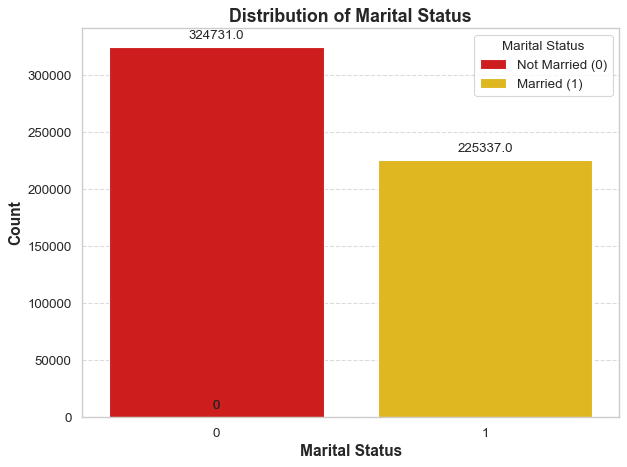

In [40]:
plt.figure(figsize=(8, 6), dpi=80)
sns.countplot(x='marital_status', data=df, palette='hot', hue='marital_status')

# Aesthetics and labels
plt.title('Distribution of Marital Status', fontsize=16, fontweight='bold')
plt.xlabel('Marital Status', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')

# Add bar labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend with labels
plt.legend(title='Marital Status', labels=['Not Married (0)', 'Married (1)'], loc='upper right', fontsize='medium')

# Increase font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


### Density Plot of Martial Vs Purchase amount

The purchase distribution is fairly similar between 'Married' and 'Unmarried' customers

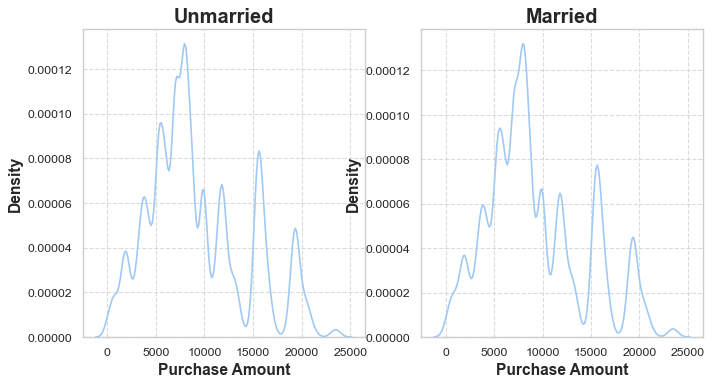

In [41]:
plt.figure(figsize=(10, 5),dpi=80)

plt.subplot(1, 2, 1)
um = df[df['marital_status'] == 0]['purchase_amount']
plt.title('Unmarried', fontsize=18, fontweight='bold')
plt.xlabel('Purchase Amount', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.kdeplot(um)

plt.subplot(1, 2, 2)
m = df[df['marital_status'] == 1]['purchase_amount']
plt.title('Married', fontsize=18, fontweight='bold')
plt.xlabel('Purchase Amount', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.kdeplot(m)

plt.show()

### Density Plot of Gender Vs Purchase amount

The purchase distribution is similar between male and female customers.

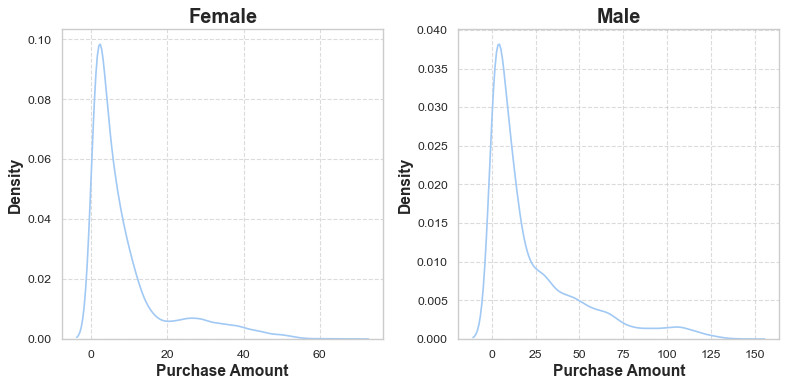

In [42]:
plt.figure(figsize=(10,5),dpi=80)
plt.subplot(1,2,1)
f=df[df['gender']=='F'].value_counts('purchase_amount')
plt.title('Female', fontsize=18, fontweight='bold')
plt.xlabel('Purchase Amount', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.kdeplot(f)

plt.subplot(1,2,2)
ma=df[df['gender']=='M'].value_counts('purchase_amount')
plt.title('Male', fontsize=18, fontweight='bold')
plt.xlabel('Purchase Amount', fontsize=14, fontweight='bold')
plt.ylabel('Density', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='x', linestyle='--', alpha=0.7)
sns.kdeplot(ma)

plt.tight_layout()
plt.show()

## Exploratory Data Analysis Using Bivariate Visualization Techniques

### Products sold by age group

The given plot is a **bivariate visualization** that shows the distribution of *products sold by age group*. Each bar represents an age group, and the height of the bar corresponds to the count of products sold in that age group. Here are the key observations: 

- **Customer Demographics:** The distribution of products sold is segmented into distinct age groups, namely Adult, Teenage, Old, and Child.

- **Customer Count:** The height of each bar represents the count of customers in each age group. The annotations on top of the bars specify the exact count for each category.

- **Relative Proportions:** The percentages associated with each age group indicate the proportion of customers within the total dataset. For example, the Adult with 375,301 customers (68.2%), Teenage with 99,660 customers (18.1%), Old with 60,005 customers (10.9%), Child with 15,102 customers (2.7%)

- **Age Group Dominance:** The bar heights give a sense of the dominance or prevalence of certain age groups in the customer base.



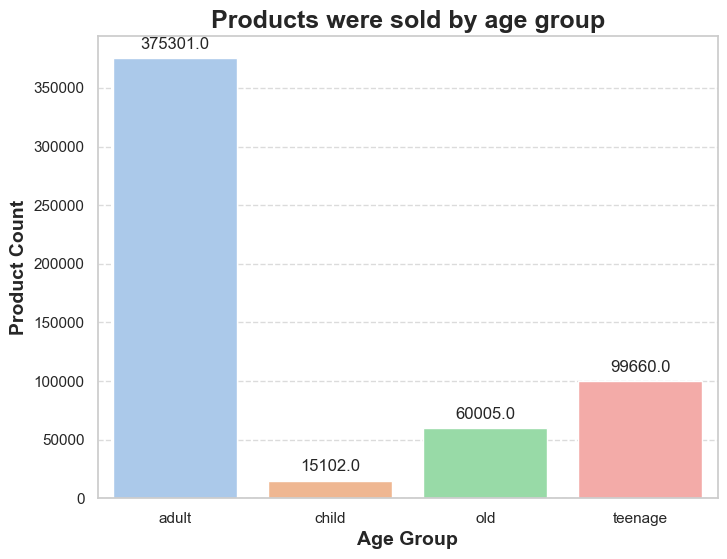

In [43]:
# Sort age values
age_data = df['age'].value_counts().sort_index()

# Create a Seaborn bar plot with hue
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=age_data.index, y=age_data.values, hue=age_data.index, palette="pastel", legend=False)

# Annotate values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Title and axis labels
plt.title("Products were sold by age group", fontsize=18, fontweight='bold')
plt.xlabel("Age Group", fontsize=14, fontweight='bold')
plt.ylabel("Product Count", fontsize=14, fontweight='bold')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


### Purchase Amount Distribution Boxplot

- The given plot is a **bivariate visualization** that illustrates the distribution of *purchase amounts with respect to gender*. 

- It is a **boxplot** that provides insights into the *central tendency*, spread, and *skewness of the purchase amounts for each gender category*. The plot uses a custom color palette for better aesthetics, and the *medians* are annotated to highlight the *central tendency* (Male and Female is **7914** and **8096** respectively).

- It is **bivariate** as it involves the relationship between two variables: '*purchase_amount*' and '*gender*'. It helps in understanding the distribution of purchase amounts for different gender categories in the dataset.

C:\Users\jasme\AppData\Local\Temp\ipykernel_44908\1150749176.py:3: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x='gender', y='purchase_amount', data=df, hue='gender', palette=custom_palette,


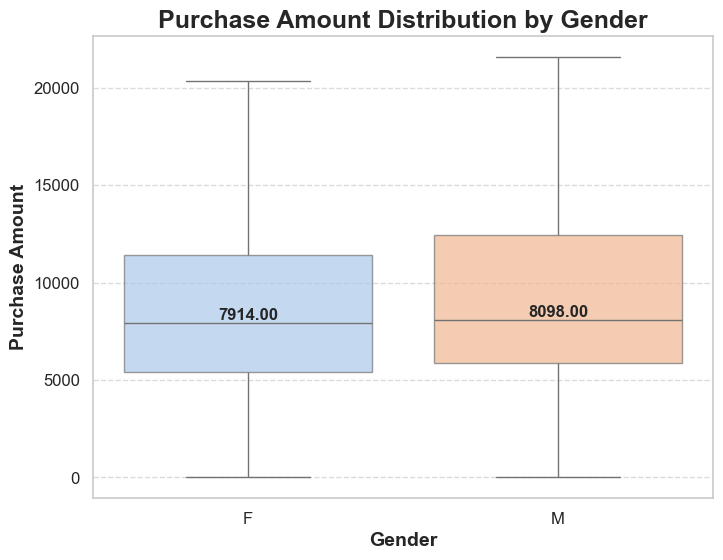

In [45]:
# Purchase Amount Distribution Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='purchase_amount', data=df, hue='gender', palette=custom_palette,
            boxprops=dict(alpha=0.7), showfliers=False)  # Set showfliers=False to hide outliers

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Increase font size
plt.title('Purchase Amount Distribution by Gender', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Purchase Amount', fontsize=14, fontweight='bold')

# Increase tick label font size
plt.tick_params(axis='both', labelsize=12)

# Add annotations for median, lower quartile (Q1), and upper quartile (Q3)
medians = df.groupby(['gender'])['purchase_amount'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

plt.show()


### Purchase Amounts by Gender Categories

- The plot allows for a quick comparison of the average purchase amounts made by different gender categories, offering insights into potential variations in shopping behavior based on gender.

- The annotated values for male and female are **9437.53** and **8734.57**, respectively. On average, *males tend to have a higher purchase amount* (approximately 9437.53) compared to *females*, whose average purchase amount is around 8734.57.

- The given plot is **Bivariate** as it visualizes the relationship between two variables that is *gender* and *purchase amount*.

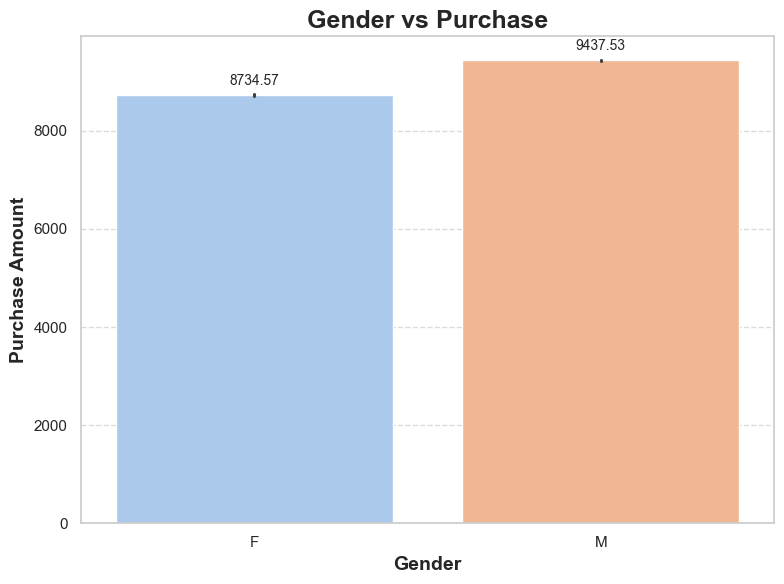

In [46]:
# Gender vs Purchase
plt.figure(figsize=(8, 6))
ax1 = sns.barplot(x='gender', y='purchase_amount', data=df, palette='pastel', hue='gender', legend=False)
plt.title('Gender vs Purchase', fontsize=18, fontweight='bold')
plt.xlabel('Gender', fontsize=14, fontweight='bold')
plt.ylabel('Purchase Amount', fontsize=14, fontweight='bold')

# Add values on top of the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Purchase Amount by Age Group

- The given plot shows the purchase amount distribution across different age groups. Each bar represents the average purchase amount for a specific age group, and the values on top of the bars indicate the exact average purchase amount.

- The given plot is bivariate as it illustrates the relationship between two variables that is "age" and "purchase_amount." Each bar represents a different age group, and the height of the bar indicates the average purchase amount for that specific age group. The annotations on top of the bars provide the exact purchase amount values, adding a second dimension to the visualization.

- The plot is univariate, focusing on the distribution of purchase amounts within each age group.

- Older age groups, particularly 'old' and 'adult,' tend to have higher average purchase amounts compared to 'teenage' and 'child' age groups.


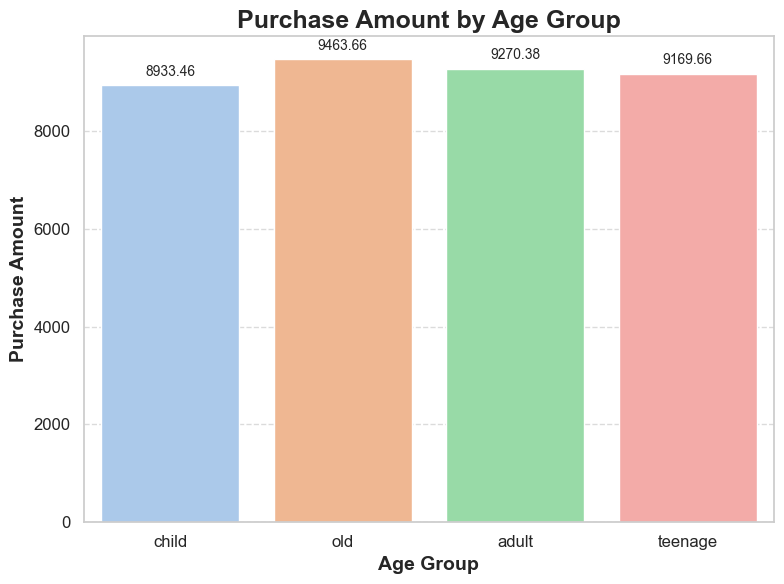

In [47]:
plt.figure(figsize=(8, 6))
custom_palette = sns.color_palette("pastel", n_colors=len(df['age'].unique()))
ax4 = sns.barplot(x='age', y='purchase_amount', data=df, hue='age', palette=custom_palette, errorbar=None, legend=False)

# Title and Axis Labels
plt.title('Purchase Amount by Age Group', fontsize=18, fontweight='bold')
plt.xlabel('Age Group', fontsize=14, fontweight='bold')
plt.ylabel('Purchase Amount', fontsize=14, fontweight='bold')

# Increase tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add values on top of the bars
for p in ax4.patches:
    ax4.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Exploratory Data Analysis Using Multivariate Visualization Techniques

### Marital Status vs Purchase Amount by Gender

- The given plot is **Multivariate visulization** as it illustrates the relationship between three variables, that is, "*marital_status*" and "*purchase_amount*", with an additional hue based on the "gender" variable. Each bar represents a different marital status category, and the height of the bar indicates the average purchase amount for that specific marital status.

- The insights from the given plot are as follows:

**Marital Status 0 (Not Married):** For gender "Female," the average purchase amount is **8679** and for gender "Male," the average purchase amount is **9453**.

**Marital Status 1 (Married):** For gender "Female," the average purchase amount is **8810** and for gender "Male," the average purchase amount is **9413**.

- In summary, in both marital status categories, the average purchase amount is higher for males than for females.


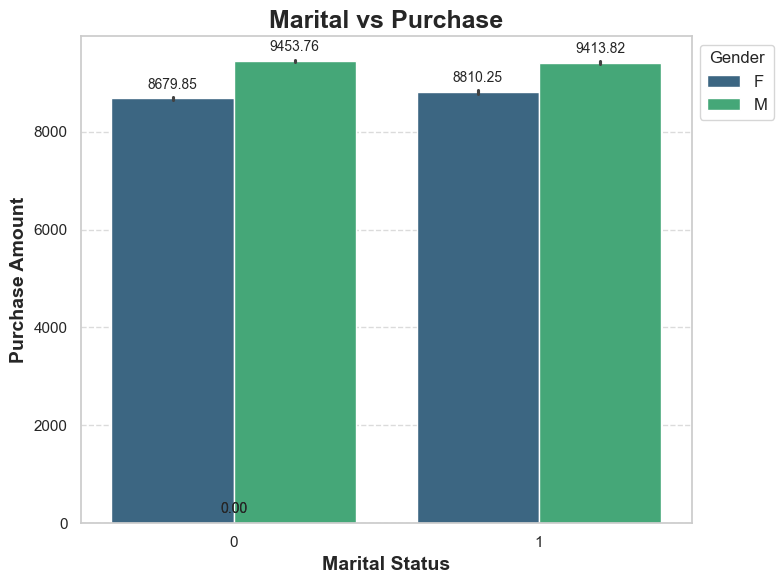

In [48]:
# Marital vs Purchase
plt.figure(figsize=(8, 6))
ax2 = sns.barplot(x='marital_status', y='purchase_amount', hue='gender', data=df, palette='viridis')
plt.title('Marital vs Purchase', fontsize=18, fontweight='bold')
plt.xlabel('Marital Status', fontsize=14, fontweight='bold')
plt.ylabel('Purchase Amount', fontsize=14, fontweight='bold')

# Add values on top of the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Add legend with labels
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### City vs Purchase Amount with Gender Distribution.

- The given plot is **multivariate** as it involves three variables, that is, "city_category," "purchase_amount," and "gender".

- The plot allows for the examination of how purchase amounts vary across city categories, considering the gender distribution within each category.

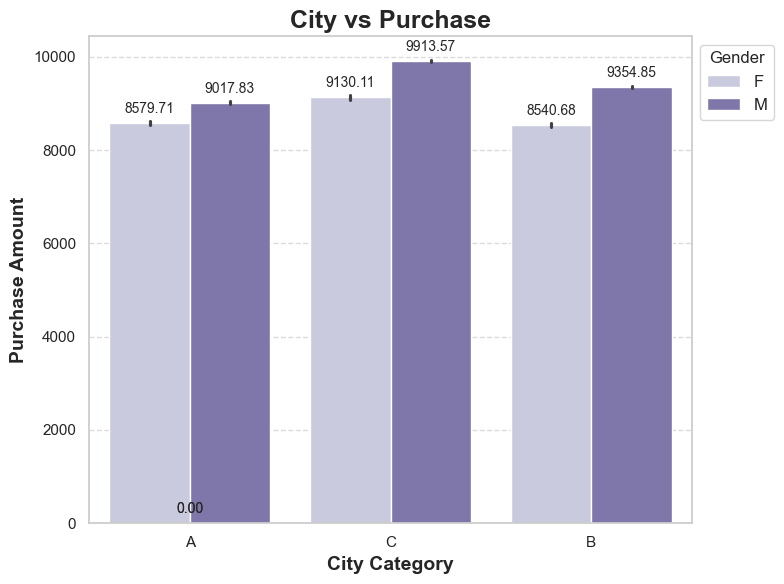

In [49]:
# City vs Purchase
plt.figure(figsize=(8, 6))
ax3 = sns.barplot(x='city_category', y='purchase_amount', hue='gender', data=df, palette='Purples')
plt.title('City vs Purchase', fontsize=18, fontweight='bold')
plt.xlabel('City Category', fontsize=14, fontweight='bold')
plt.ylabel('Purchase Amount', fontsize=14, fontweight='bold')

# Add values on top of the bars
for p in ax3.patches:
    ax3.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Add legend with labels
plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Marital Status vs. Purchase Activity with Age Breakdown


- The bar plot highlights that unmarried individuals exhibit higher purchasing activity compared to their married counterparts. Notably, within the unmarried group, there is a distinct surge in purchasing rates among older individuals. In contrast, among married individuals, the purchasing rate is higher for the older age group.

- The plot is **Multivariate visulization**.

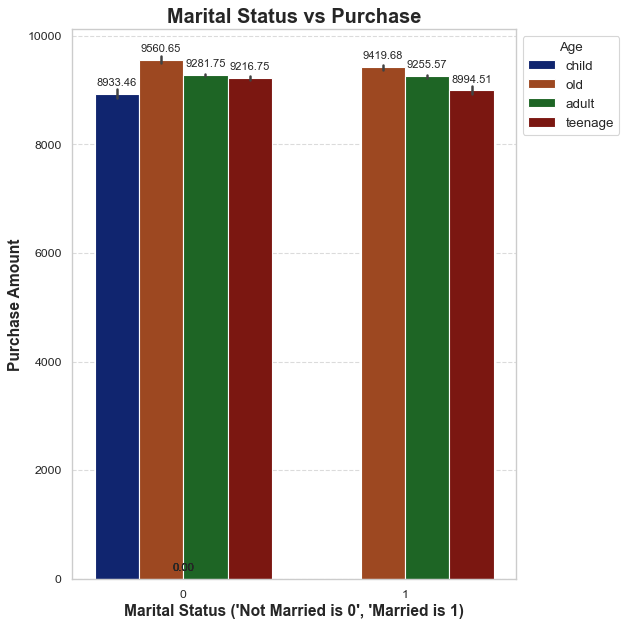

In [50]:
# Set the size of the figure
plt.figure(figsize=(8, 8), dpi=80)

# Plotting marital status vs purchase with age as hue
ax = sns.barplot(x='marital_status', y='purchase_amount', data=df, palette='dark', hue='age')

# Set the title
plt.title('Marital Status vs Purchase', fontsize=18, fontweight='bold')

# Set the labels for x and y axes
plt.xlabel("Marital Status ('Not Married is 0', 'Married is 1)", fontsize=14, fontweight='bold')
plt.ylabel('Purchase Amount', fontsize=14, fontweight='bold')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move the legend to the right of the plot
plt.legend(title='Age', loc='upper left', bbox_to_anchor=(1, 1), fontsize='medium')

# Adjust the layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()


### Boxplot: City Category vs Purchase by Marital Status

The provided Boxplot with enhanced aesthetics and custom color palette allows us to make the following observations:

**1. Marital Status Comparison:** The different colors in the boxplot represent different marital statuses (Not Married - 0, Married - 1). This allows for a visual comparison of purchase amounts between marital status groups within each city category.

**2. Central Tendency:** The annotations for median purchase amounts provide insights into the central tendency of spending within each city category. Hence, it is easy to identify the **median values** for both marital status groups which was found to **same**. 

**3. Variability in Purchase Amounts:** The width and length of the boxes illustrate the interquartile range (IQR), with the lower and upper quartiles (Q1 and Q3) providing information about the variability in purchase amounts. Here, as we can see that **City B** has Variablity in **Q1** and **Q2** but **IQR** was nearly same with **City C**

**4. City Category Comparison:** By comparing boxplots across different city categories, we can assess how purchasing behavior varies between cities. Here, **City B's** purchase amount is **8585.00** which was much more than City A but nearly similar to City C.

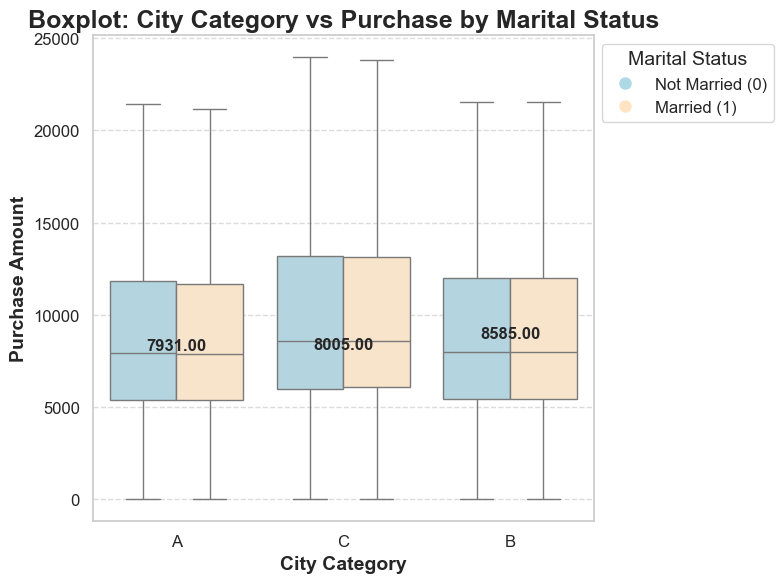

In [51]:
# Set a custom color palette for marital status
marital_palette = {0: 'lightblue', 1: 'bisque'}

# Boxplot with enhanced aesthetics
plt.figure(figsize=(8, 6))
sns.boxplot(x='city_category', y='purchase_amount', data=df, hue='marital_status', palette=marital_palette, showfliers=False )

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Increase font size
plt.title('Boxplot: City Category vs Purchase by Marital Status', fontsize=18, fontweight='bold')
plt.xlabel('City Category', fontsize=14, fontweight='bold')
plt.ylabel('Purchase Amount', fontsize=14, fontweight='bold')

# Manually create a custom legend
legend_labels = ['Not Married (0)', 'Married (1)']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=marital_palette[i], markersize=10) for i in range(2)]
plt.legend(legend_handles, legend_labels, title='Marital Status', title_fontsize='14', fontsize='12', loc='upper left', bbox_to_anchor=(1, 1))

# Increase tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for median, lower quartile (Q1), and upper quartile (Q3)
medians = df.groupby(['city_category'])['purchase_amount'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', horizontalalignment='center', verticalalignment='bottom', fontweight='bold')

# Adjust plot layout
plt.tight_layout()

plt.show()


### Violin Plot: Age vs Purchase by Gender

The provided Violin Plot, along with annotations for median, lower quartile (Q1), and upper quartile (Q3), allows us to make the following observations:

**1. Median Purchase Amounts:** The annotations on the plot indicate the median purchase amounts for each age group and gender. This helps in understanding the central tendency of spending behavior within different demographic segments.

**2. Variability in Purchase Amounts:** The width and shape of the violins illustrate the probability density of purchase amounts. Wider sections suggest higher variability in spending within specific ranges. The annotations provide specific values for Q1 and Q3, aiding in the assessment of variability.

**3. Age and Gender Comparisons:** By comparing violins within the same age group, you can identify patterns and differences in purchasing behavior between genders. The annotations provide quantitative values for better understanding.

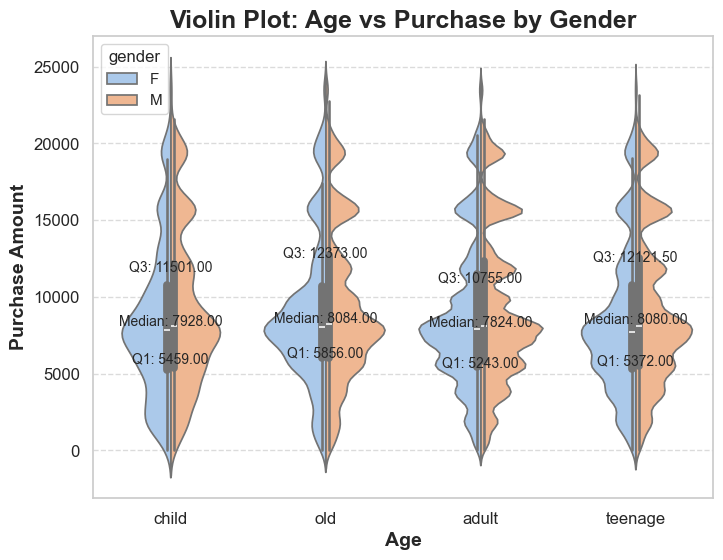

In [52]:
# Calculate statistics for annotation
median_values = df.groupby(['age', 'gender'])['purchase_amount'].median().reset_index()
median_values
q1_values = df.groupby(['age', 'gender'])['purchase_amount'].quantile(0.25).reset_index()
q1_values
q3_values = df.groupby(['age', 'gender'])['purchase_amount'].quantile(0.75).reset_index()
q3_values

# Create a Violin Plot
plt.figure(figsize=(8, 6))
ax = sns.violinplot(x='age', y='purchase_amount', data=df, hue='gender', palette='pastel', split=True)

# Add annotations for median, lower quartile (Q1), and upper quartile (Q3)
for x, med, q1, q3, gender in zip(ax.get_xticks(), median_values['purchase_amount'], q1_values['purchase_amount'], q3_values['purchase_amount'], median_values['gender']):
    ax.text(x, med, f'Median: {med:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(x, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', fontsize=10)
    ax.text(x, q3, f'Q3: {q3:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Violin Plot: Age vs Purchase by Gender', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14, fontweight='bold')
plt.ylabel('Purchase Amount', fontsize=14, fontweight='bold')

# Increase tick label font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Predictive Modeling

### Converting Categorical Attributes to Numerical Using a Dictionary

Now, the categorical attributes need to be transformed into numerical values, and this will be achieved using a dictionary.


In [53]:
gender_dict  = {'F':0, 'M':1}
df['gender'] = df['gender'].apply(lambda x: gender_dict[x])
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase_amount
0,1000001,P00069042,0,child,10,A,2,0,3,4.0,16.0,8370
1,1000001,P00248942,0,child,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,child,10,A,2,0,12,4.0,16.0,1422
3,1000001,P00085442,0,child,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,old,16,C,4,0,8,8.0,16.0,7969


In [54]:
label_encoder            = LabelEncoder()
df['age']                = label_encoder.fit_transform(df['age'])
df['city_category']      = label_encoder.fit_transform(df['city_category'])
df['stay_in_city_years'] = label_encoder.fit_transform(df['stay_in_city_years'])
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase_amount
0,1000001,P00069042,0,1,10,0,2,0,3,4.0,16.0,8370
1,1000001,P00248942,0,1,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,1,10,0,2,0,12,4.0,16.0,1422
3,1000001,P00085442,0,1,10,0,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,2,16,2,4,0,8,8.0,16.0,7969


### Correlation heatmap

In [55]:
# Correlation Matrix
correlation_matrix = df[numerical_cols].corr()  # df.corr()
correlation_matrix

,occupation,stay_in_city_years,marital_status,product_category_1,product_category_2,product_category_3
occupation,1.000000,0.030005,0.024280,-0.007618,0.000793,0.000246
stay_in_city_years,0.030005,1.000000,-0.012819,-0.004213,-0.000453,0.000016
marital_status,0.024280,-0.012819,1.000000,0.019888,0.016449,0.013978
product_category_1,-0.007618,-0.004213,0.019888,1.000000,0.273386,0.317944
product_category_2,0.000793,-0.000453,0.016449,0.273386,1.000000,0.457804
product_category_3,0.000246,0.000016,0.013978,0.317944,0.457804,1.000000


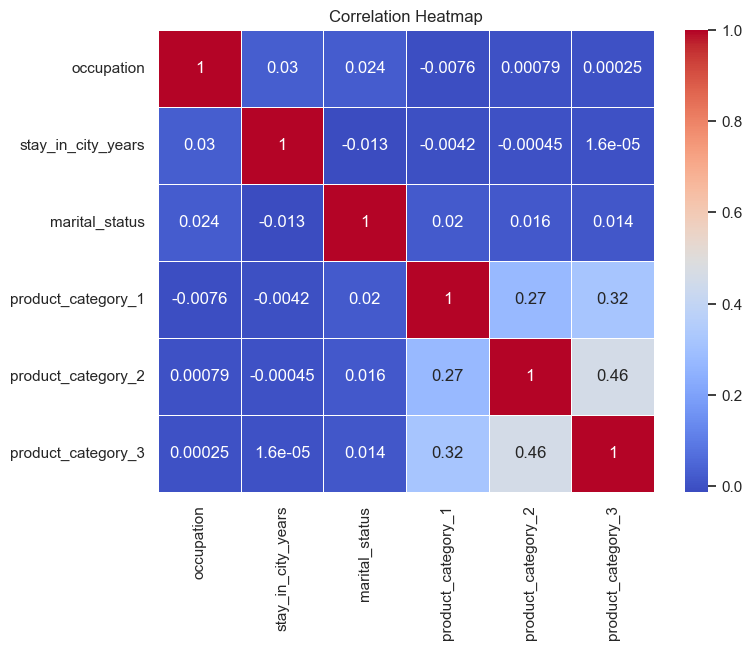

In [56]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Correlation Insights**

The variable *purchase_amount* exhibits the strongest correlation with *product_category_1* and *product_category_3*. Additionally, there is a positive correlation with *marital_status* and *age*.



### Data Split for Training

To ensure unbiased results, it's crucial to exclude user_id and product_id from the training data. This omission is necessary as including them could introduce bias towards user_id or product_id. Additionally, the output data, purchase_amount, is also removed from X for training.

In [57]:
# Select features and target variable
features = [ 'gender', 'age', 'occupation', 'city_category', 'stay_in_city_years', 'marital_status', 
            'product_category_1', 'product_category_2', 'product_category_3']

# Features (X)
X = df[features]

# Target variable (y)
y = df['purchase_amount']

### Model Training

In [65]:
def train(model, X, y):
    
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y,random_state=42, test_size=0.25)
    
    model.fit(x_train, y_train)
    
    # predict the results
    pred = model.predict(x_test)
    
    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    # R Square
    r2 = r2_score(y_test, pred)
    
    # Calculate the mean and standard deviation of the cross-validated scores
    mean_cv_score = np.mean(cv_score)
    std_cv_score  = np.std(cv_score)

    print("Results")
    print("Predict Values:", pred)
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("R-squared:", r2)
    print("CV Score:", np.sqrt(cv_score))
    print(f"Cross-validated Mean Squared Error: {mean_cv_score}")
    print(f"Cross-validated Standard Deviation: {std_cv_score}")

### Linear Regression Model

Now we display the basic models 

In [66]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)    # cross validation
cv_score = np.abs(np.mean(cv_score))
    
# Display model performance metrics
print("Results")
print(f"Predict Values: {y_pred}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")
print(f"CV Score: {np.sqrt(cv_score)}")

Results
Predict Values: [11385.00029471 10508.23447035  7279.94965309 ...  9032.03366305
  7300.01233555 10474.34902924]
MSE: 21913458.99991089
R-squared: 0.12882987835180681
CV Score: 4687.840722177024


<Axes: title={'center': 'Model Coefficients'}>

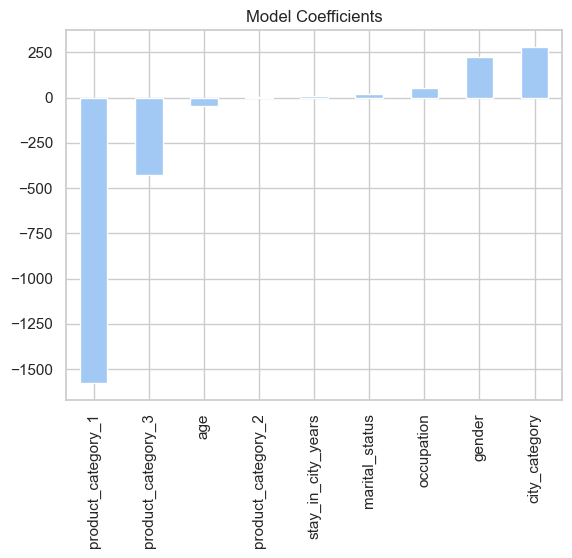

In [67]:
# Create a pipeline with StandardScaler and LinearRegression
model = make_pipeline(StandardScaler(), LinearRegression())

# Train the model
model.fit(X, y)
# Get coefficients
coef = pd.Series(model.named_steps['linearregression'].coef_, features).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

To optimize the performance of the Linear Regression model, data normalization is essential. Notably, the Gender category demonstrates a notable coefficient in the Linear Regression model

### Decision Tree Regression

Results
Predict Values: [15202.          9898.5        10033.         ...  6029.13235294
  4338.83333333 13908.25      ]
MSE: 3273.3066686069433
R-squared: 0.5740433262101032
CV Score: 3253.1884304697987
Cross-validated Mean Squared Error: 10583234.964142552
Cross-validated Standard Deviation: 0.0


<Axes: title={'center': 'Feature Importance'}>

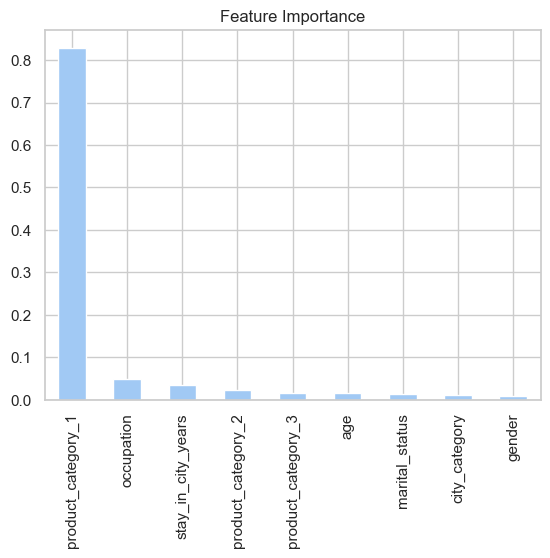

In [68]:
model = DecisionTreeRegressor()
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Enhancements in results are observed when compared to the Linear Regression model. Notably, Product_Category_1 exhibits significantly higher feature importance than in the Linear Regression model.

### Random Forest Regression

Results
Predict Values: [14350.2405177  10176.02037287  8928.61654692 ...  6035.41053108
  4318.30383084 13986.96387338]
MSE: 3064.928441134558
R-squared: 0.6265497840085967
CV Score: 3054.9234046559704
Cross-validated Mean Squared Error: 9332557.008314827
Cross-validated Standard Deviation: 0.0


<Axes: title={'center': 'Feature Importance'}>

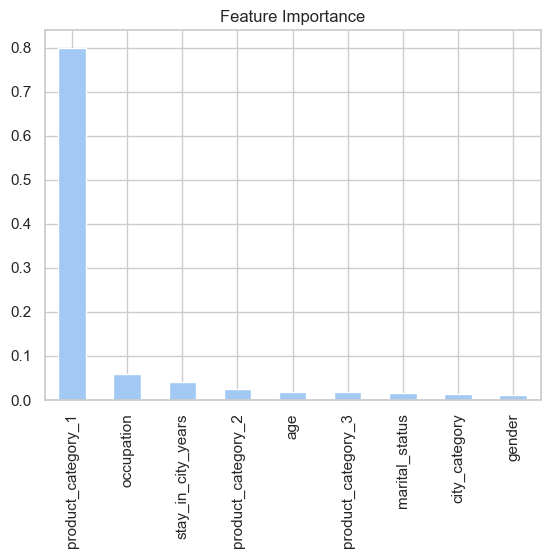

In [69]:
model = RandomForestRegressor(n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

**Random Forest Regressor** demonstrates **superior performance** compared to the Decision Tree Regressor, *exhibiting lower Mean Squared Error* (MSE) and *cross-validated scores*. Thus, among the three models, the Random Forest Regressor emerges as the top performer.

##  Resultant Plot on Predictive Model

In [70]:
# Define the models and their performance metrics
models     = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_values = [21913458.99991089, 3273.9483203091595, 3064.070552448999]
r2_values  = [0.12882987835180681, 0.5738763130696174, 0.6267588158886386]
cv_scores  = [4687.840722177024, 3251.6551110078267, 3054.8020253863933]

# Create a DataFrame for visualization
performance_df = pd.DataFrame({'Model': models, 'MSE': mse_values, 'R-squared': r2_values, 'CV Score': cv_scores})
performance_df

,Model,MSE,R-squared,CV Score
0,Linear Regression,2.191346e+07,0.128830,4687.840722
1,Decision Tree,3.273948e+03,0.573876,3251.655111
2,Random Forest,3.064071e+03,0.626759,3054.802025


### Plotting MSE on Predictive Model

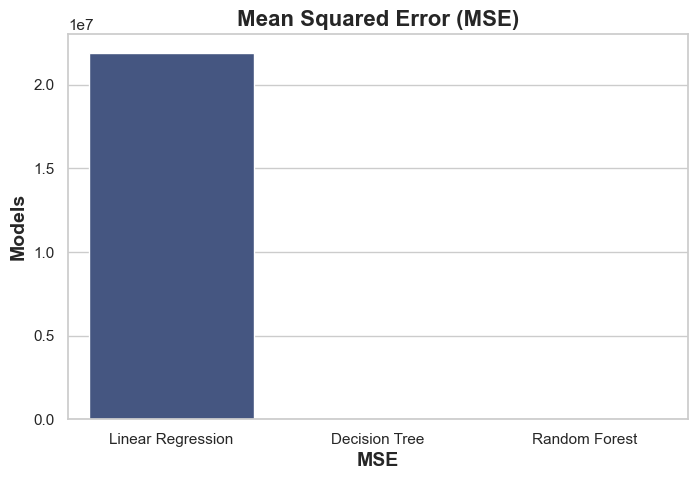

In [71]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='MSE', data=performance_df, hue='Model', palette='viridis', legend=False)
plt.title('Mean Squared Error (MSE)', fontsize=16, fontweight='bold')
plt.xlabel('MSE', fontsize=14, fontweight='bold')
plt.ylabel('Models', fontsize=14, fontweight='bold')
plt.show()

### Plotting R-squared on Predictive Model

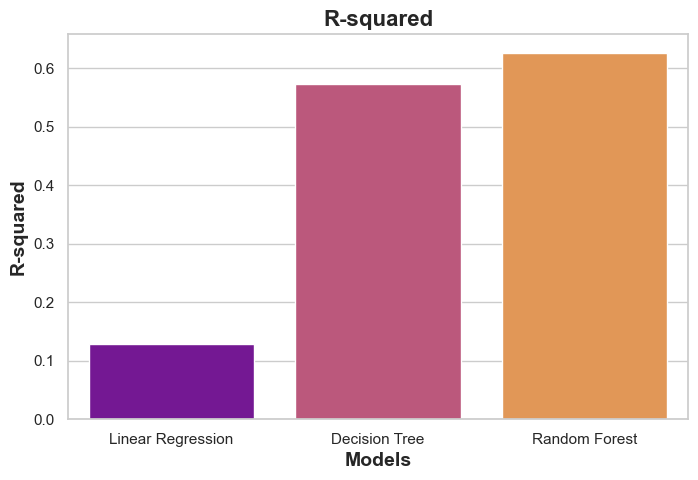

In [72]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='R-squared', data=performance_df, hue='Model', palette='plasma', legend=False)
plt.title('R-squared', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('R-squared', fontsize=14, fontweight='bold')
plt.show()

### Plotting CV Score on Predictive Model

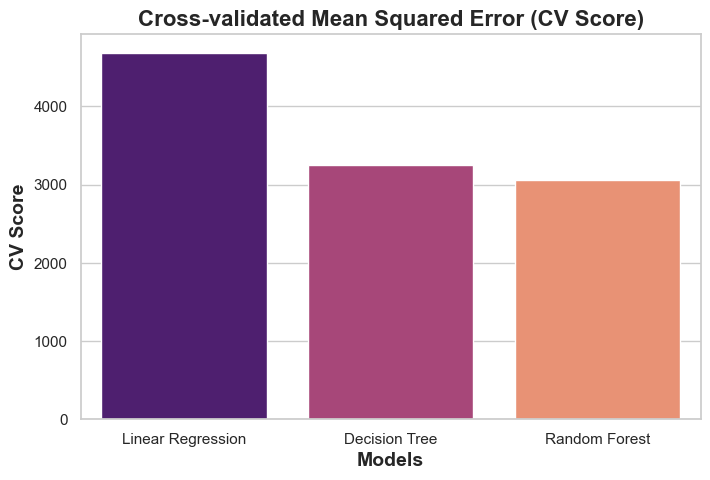

In [73]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='CV Score', data=performance_df, hue='Model', palette='magma', legend=False)
plt.title('Cross-validated Mean Squared Error (CV Score)', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=14, fontweight='bold')
plt.ylabel('CV Score', fontsize=14, fontweight='bold')
plt.show()